In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
data = pd.read_csv("/content/1369154005_200005_sellOut.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data.columns = ['DATE', 'IPG2211A2N']
data

,DATE,IPG2211A2N
0,2018-01-21,431000
1,2018-01-28,379000
2,2018-02-04,0
3,2018-02-11,577000
4,2018-02-18,0
...,...,...
215,2022-03-06,1282000
216,2022-03-13,1289000
217,2022-03-20,1339000
218,2022-03-27,1385000


In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.sort_values(by='DATE', inplace=True)
data.columns = ['index', 'IPG2211A2N']
data

,index,IPG2211A2N
0,2018-01-21,431000
1,2018-01-28,379000
2,2018-02-04,0
3,2018-02-11,577000
4,2018-02-18,0
...,...,...
215,2022-03-06,1282000
216,2022-03-13,1289000
217,2022-03-20,1339000
218,2022-03-27,1385000


In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])
time_diff = data['DATE'].diff()
expected_interval = pd.Timedelta(hours=1)
gaps = time_diff[time_diff > expected_interval]
if not gaps.empty:
    print("Gaps detected in the time series data.")
    print(gaps)
else:
    print("No gaps detected in the time series data.")

In [ ]:
# Set 'Datetime' as the index
data.set_index('DATE', inplace=True)

# Generate a date range from the first date to the last date with hourly frequency
date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')

# Reindex the DataFrame with the complete date range
df = data.reindex(date_range)
df

In [ ]:
# Use forward fill (LOCF) to fill missing values
df['IPG2211A2N'].fillna(method='ffill', inplace=True)

# Reset the index to have 'Datetime' as a regular column
df.reset_index(inplace=True)

In [ ]:
df = df.assign(FillMean=df.IPG2211A2N.fillna(df.IPG2211A2N.mean()))

In [ ]:
df

,index,IPG2211A2N,FillMean
0,1985-01-01,72.5052,72.5052
1,1985-01-02,72.5052,72.5052
2,1985-01-03,72.5052,72.5052
3,1985-01-04,72.5052,72.5052
4,1985-01-05,72.5052,72.5052
...,...,...,...
12049,2017-12-28,114.7212,114.7212
12050,2017-12-29,114.7212,114.7212
12051,2017-12-30,114.7212,114.7212
12052,2017-12-31,114.7212,114.7212


In [ ]:
df=data.copy()

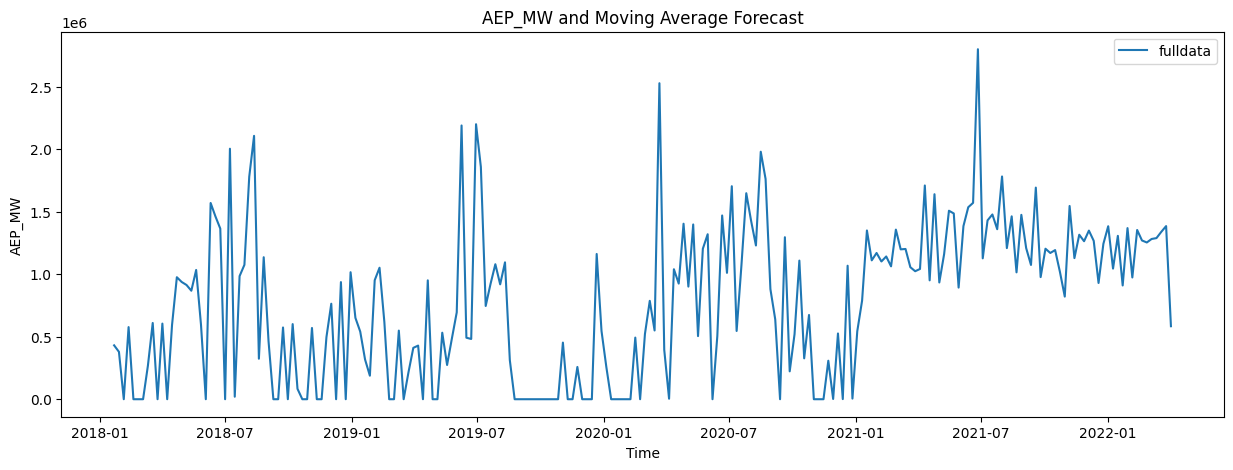

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['index'], df['IPG2211A2N'], label='fulldata')
# plt.plot(test_data['Datetime'],test_data['AEP_MW'], label='Test')
# plt.plot(test_data['Datetime'],test_data['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('AEP_MW')
plt.title('AEP_MW and Moving Average Forecast')
plt.show()

In [ ]:
# start_date = '2004-10-01 01:00:00'
# end_date = '2004-12-01 01:00:00'

# selected_data = data[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date)]


In [ ]:
df['time_idx'] = range(len(df))
# df = df.drop(['FillMean'], axis=1)
constant_value = 'series'
df['series'] = 1

In [ ]:
# split_date = '2014-01-01'
# split_index = len(df[df['index'] < split_date])

In [ ]:
train_data = df.iloc[:200]
test_data = df.iloc[200:]

In [ ]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
train_data

,index,IPG2211A2N,time_idx,series
0,2018-01-21,431000,0,1
1,2018-01-28,379000,1,1
2,2018-02-04,0,2,1
3,2018-02-11,577000,3,1
4,2018-02-18,0,4,1
...,...,...,...,...
195,2021-10-17,1193000,195,1
196,2021-10-24,1018000,196,1
197,2021-10-31,821000,197,1
198,2021-11-07,1546000,198,1


In [ ]:
test_data

,index,IPG2211A2N,time_idx,series
0,2021-11-21,1316000,200,1
1,2021-11-28,1264000,201,1
2,2021-12-05,1349000,202,1
3,2021-12-12,1267000,203,1
4,2021-12-19,930000,204,1
5,2021-12-26,1243000,205,1
6,2022-01-02,1384000,206,1
7,2022-01-09,1045000,207,1
8,2022-01-16,1307000,208,1
9,2022-01-23,910000,209,1


In [ ]:
!pip install pytorch_forecasting

In [ ]:
df

,index,IPG2211A2N,time_idx,series
0,2018-01-21,431000,0,1
1,2018-01-28,379000,1,1
2,2018-02-04,0,2,1
3,2018-02-11,577000,3,1
4,2018-02-18,0,4,1
...,...,...,...,...
215,2022-03-06,1282000,215,1
216,2022-03-13,1289000,216,1
217,2022-03-20,1339000,217,1
218,2022-03-27,1385000,218,1


In [ ]:
train_data

,index,IPG2211A2N,time_idx,series
0,2018-01-21,431000,0,1
1,2018-01-28,379000,1,1
2,2018-02-04,0,2,1
3,2018-02-11,577000,3,1
4,2018-02-18,0,4,1
...,...,...,...,...
195,2021-10-17,1193000,195,1
196,2021-10-24,1018000,196,1
197,2021-10-31,821000,197,1
198,2021-11-07,1546000,198,1


In [ ]:
len(df[df['IPG2211A2N']==0])

49

In [ ]:
# max_prediction_length = 365 # a whole year
# min_encoder_length = 365
# max_encoder_length = train_data.index.nunique()
max_encoder_length = 60
max_prediction_length = 20


context_length = max_encoder_length
prediction_length = max_prediction_length

# keep the validation set held-out
training_cutoff = train_data["time_idx"].max() - max_prediction_length

In [ ]:
# from pytorch_forecasting.data.encoders import MultiCategoryEncoder
# encoder = MultiCategoryEncoder(add_nan=True)
# transformed_train = encoder.transform(train_data)
# transformed_test = encoder.transform(test_data)

In [ ]:

from pytorch_forecasting import NBeats, TimeSeriesDataSet
from pytorch_forecasting import NaNLabelEncoder

# Create training set
training_dataset = TimeSeriesDataSet(
    train_data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="IPG2211A2N", # target variable
    group_ids=["series"], # static covariates
    max_encoder_length=context_length,
    max_prediction_length=prediction_length,
    time_varying_unknown_reals=['IPG2211A2N'],
    categorical_encoders={
        'series': NaNLabelEncoder(add_nan=True),
        '__group_id__series': NaNLabelEncoder(add_nan=True)
    }
)


In [ ]:
train_data

,index,IPG2211A2N,time_idx,series
0,2018-01-21,431000,0,1
1,2018-01-28,379000,1,1
2,2018-02-04,0,2,1
3,2018-02-11,577000,3,1
4,2018-02-18,0,4,1
...,...,...,...,...
195,2021-10-17,1193000,195,1
196,2021-10-24,1018000,196,1
197,2021-10-31,821000,197,1
198,2021-11-07,1546000,198,1


In [ ]:
training_dataset

TimeSeriesDataSet[length=101](
	time_idx='time_idx',
	target='IPG2211A2N',
	group_ids=['series'],
	weight=None,
	max_encoder_length=60,
	min_encoder_length=60,
	min_prediction_idx=0,
	min_prediction_length=20,
	max_prediction_length=20,
	static_categoricals=[],
	static_reals=[],
	time_varying_known_categoricals=[],
	time_varying_known_reals=[],
	time_varying_unknown_categoricals=[],
	time_varying_unknown_reals=['IPG2211A2N'],
	variable_groups={},
	constant_fill_strategy={},
	allow_missing_timesteps=False,
	lags={},
	add_relative_time_idx=False,
	add_target_scales=False,
	add_encoder_length=False,
	target_normalizer=NaNLabelEncoder(add_nan=False, warn=True),
	categorical_encoders={'series': NaNLabelEncoder(add_nan=True, warn=True), '__group_id__series': NaNLabelEncoder(add_nan=True, warn=False)},
	scalers={},
	randomize_length=None,
	predict_mode=False
)

In [ ]:
validation = TimeSeriesDataSet.from_dataset(training_dataset, train_data, min_prediction_idx=training_cutoff + 1)
validation

In [ ]:
validation = TimeSeriesDataSet.from_dataset(training_dataset, train_data, min_prediction_idx=training_cutoff + 1)
testing = TimeSeriesDataSet.from_dataset(training_dataset, test_data, predict=True, stop_randomization=True)

batch_size = 64


train_dataloader = training_dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)
test_dataloader = testing.to_dataloader(train=False, batch_size=1, shuffle=False)

## Train

In [ ]:
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping
import pandas as pd
import torch

from pytorch_forecasting import Baseline, NBeats, TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.data.examples import generate_ar_data
from pytorch_forecasting.metrics import SMAPE

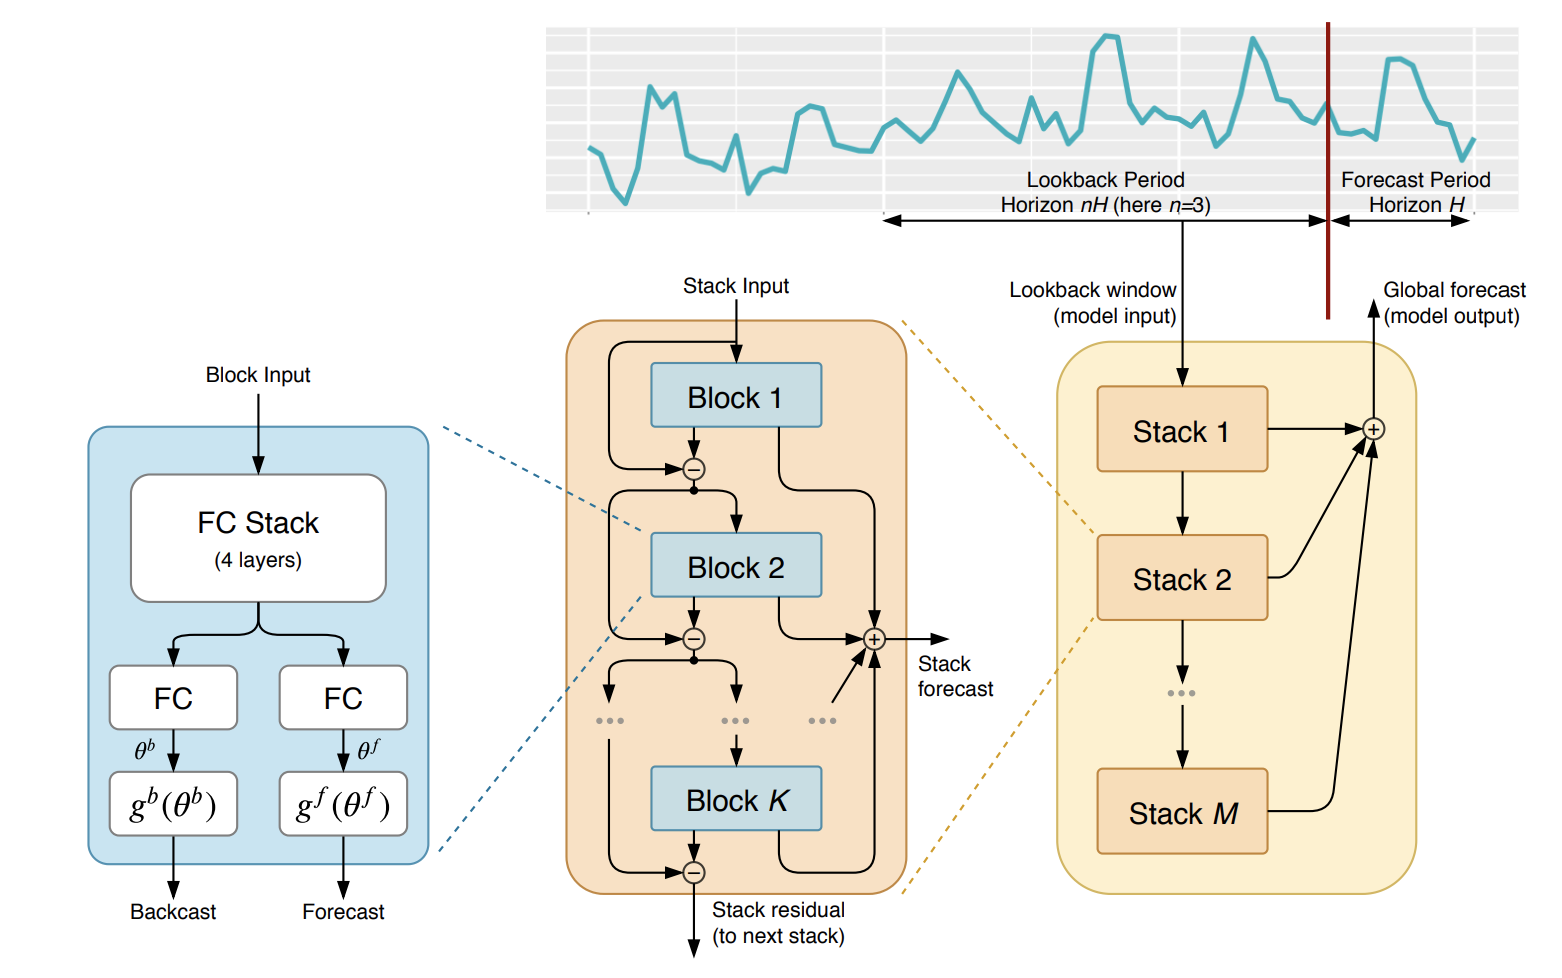

In [ ]:
# calculate baseline absolute error
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
SMAPE()(baseline_predictions, actuals)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, u

tensor(0.)

In [ ]:
pl.seed_everything(42)
trainer = pl.Trainer(accelerator="auto", gradient_clip_val=0.01)
net = NBeats.from_dataset(training_dataset, learning_rate=0.0056234, weight_decay=1e-2, widths=[32, 512], backcast_loss_ratio=0.1)

INFO: Global seed set to 42
INFO:lightning.fabric.utilities.seed:Global seed set to 42
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'logging_metrics' is an in

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/utilities.py:72: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.004466835921509632
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.004466835921509632
INFO: Restoring states from the checkpoint path at /content/.lr_find_7597acd6-85d0-4bba-b4ed-f4cde2cab2ea.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_7597acd6-85d0-4bba-b4ed-f4cde2cab2ea.ckpt
INFO: Restored all states from the checkpoint at /content/.lr_find_7597acd6-85d0-4bba-b4ed-f4cde2cab2ea.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_7597acd6-85d0-4bba-b4ed-f4cde2cab2ea.ckpt


suggested learning rate: 0.004466835921509632


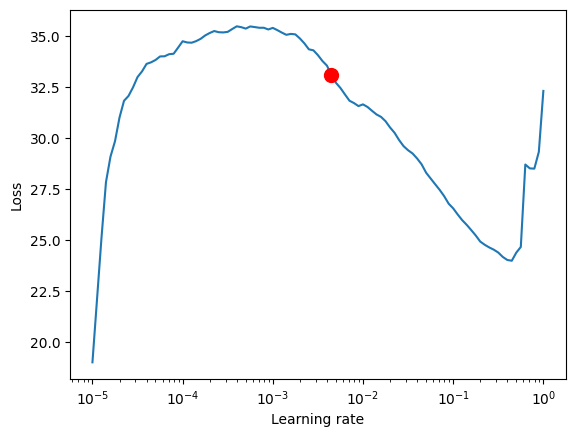

In [ ]:
# find optimal learning rate
from lightning.pytorch.tuner import Tuner

res = Tuner(trainer).lr_find(net, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader, min_lr=1e-5)
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()
net.hparams.learning_rate = res.suggestion()

In [ ]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
trainer = pl.Trainer(
    max_epochs=3,
    accelerator="auto",
    enable_model_summary=True,
    gradient_clip_val=0.01,
    callbacks=[early_stop_callback],
    limit_train_batches=150,
)

import time
start_time = time.time()
net = NBeats.from_dataset(
    training_dataset,
    learning_rate=0.004466835921509632,
    log_interval=10,
    log_val_interval=1,
    weight_decay=1e-2,
    widths=[32, 512],
    backcast_loss_ratio=1.0,
)

trainer.fit(
    net,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

end_time = time.time()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to i

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=3` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


## Evaluation

In [ ]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_model = NBeats.load_from_checkpoint(best_model_path)

In [ ]:
best_model

NBeats(
  	"backcast_loss_ratio":           1.0
  	"context_length":                60
  	"dropout":                       0.1
  	"expansion_coefficient_lengths": [3, 7]
  	"learning_rate":                 0.004466835921509632
  	"log_gradient_flow":             False
  	"log_interval":                  10
  	"log_val_interval":              1
  	"logging_metrics":               ModuleList(
  	  (0): SMAPE()
  	  (1): MAE()
  	  (2): RMSE()
  	  (3): MAPE()
  	  (4): MASE()
  	)
  	"loss":                          MASE()
  	"monotone_constaints":           {}
  	"num_block_layers":              [3, 3]
  	"num_blocks":                    [3, 3]
  	"optimizer":                     Ranger
  	"optimizer_params":              None
  	"output_transformer":            EncoderNormalizer(
  		method='standard',
  		center=True,
  		max_length=None,
  		transformation='relu',
  		method_kwargs={}
  	)
  	"prediction_length":             24
  	"reduce_on_plateau_min_lr":      1e-05
  	"reduce_on_

In [ ]:
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_model.predict(val_dataloader)
(actuals - predictions).abs().mean()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


tensor(0.2503)

In [ ]:
raw_predictions, x, index, decoder_lengths, y= best_model.predict(val_dataloader, mode="raw", return_x=True)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
raw_predictions

Output(prediction=tensor([[113.4792, 113.5140, 113.5394, 113.4941, 113.4160, 113.3992, 113.5031,
         113.6949, 113.8688, 113.9229, 113.8331, 113.6682, 113.5396, 113.5251,
         113.6239, 113.7709, 113.8911, 113.9506, 113.9663, 113.9735, 113.9836,
         113.9678, 113.8799, 113.6963]]), backcast=tensor([[ 90.0350,  90.3899,  90.7365,  91.0858,  91.4092,  91.6606,  91.8162,
          91.8984,  91.9624,  92.0571,  92.1906,  92.3265,  92.4108,  92.4078,
          92.3174,  92.1673,  91.9941,  91.8382,  91.7553,  91.8298,  92.1613,
          92.8164,  93.7688,  94.8731,  95.9057,  96.6615,  97.0525,  97.1460,
          97.1122,  97.1135,  97.2085,  97.3353,  97.3820,  97.2912,  97.1169,
          96.9907,  97.0193,  97.1949,  97.3906,  97.4530,  97.3274,  97.1169,
          97.0204,  97.1830,  97.5652,  97.9388,  98.0362,  97.7688,  97.3689,
          97.3406,  98.2226, 100.2883, 103.3593, 106.8486, 110.0156, 112.2905,
         113.4914, 113.8283, 113.7182, 113.5409]]), trend=tens

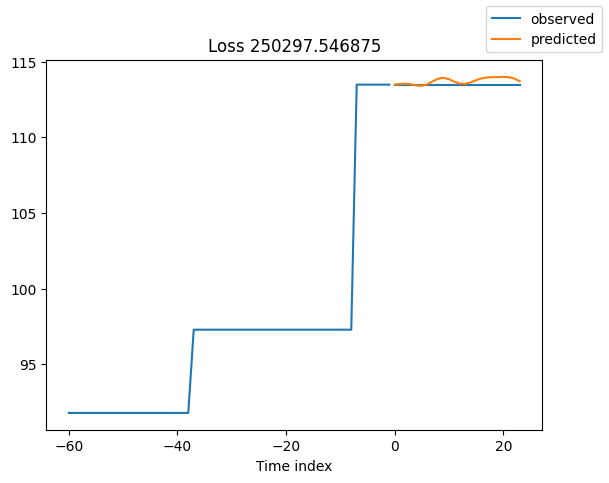

In [ ]:
best_model.plot_prediction(x, raw_predictions, add_loss_to_title=True)
plt.show()

In [ ]:
# from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer

# # Load and preprocess the data
# dataset = TimeSeriesDataSet.from_csv('data.csv', target='target', time_idx='time', group_ids=['id'])
# dataset.prepare_training(split_into_train_val_test=[0.8, 0.1, 0.1
# # Generate predictions
# predictions = model.predict(dataset.test_dataloader())

# # Evaluate the model
# metric = dataset.target_normalizer.metrics['mse']
# print(f'Test MSE: {metric(predictions, dataset.test_dataloader())}')

In [ ]:
predictions = best_model.predict(test_dataloader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
import torch

# Iterate through the test_dataloader to get actual values
for batch in test_dataloader:
    inputs, targets = batch  # Assuming your DataLoader returns inputs and targets
    # Print or process the actual values
    print("Actual Targets:", targets)

Actual Targets: (tensor([[114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
         114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
         114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
         114.7212, 114.7212, 129.4048]]), None)


In [ ]:
actuals= torch.cat([y[0] for x, y in iter(test_dataloader)])

In [ ]:
predictions=predictions[0]

In [ ]:
(actuals - predictions).abs().mean()

tensor(0.8024)

In [ ]:
from pytorch_forecasting.metrics import MAE, MASE, RMSE, SMAPE, MAPE

In [ ]:
# Calculate the RMSE
rmse = RMSE()(predictions,actuals)

print("RMSE:", rmse)

mae= MAE()(predictions,actuals)
print("MAE:", mae)

RMSE: tensor(2.7272)
MAE: tensor(0.8024)


In [ ]:
test_dataloader

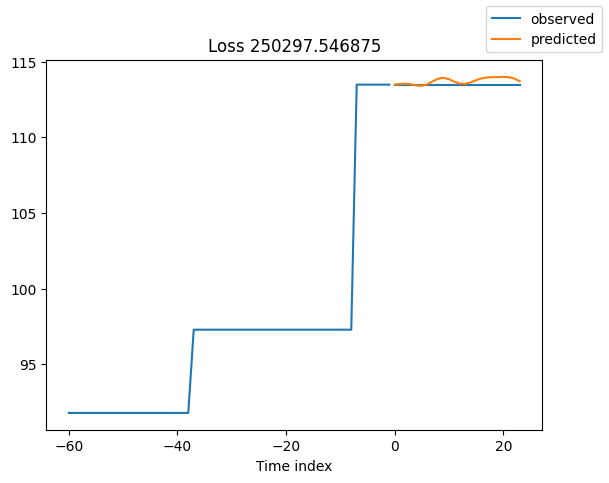

In [ ]:
 # Plot 10 examples


for idx in range(1):
    best_model.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True)
    plt.show()


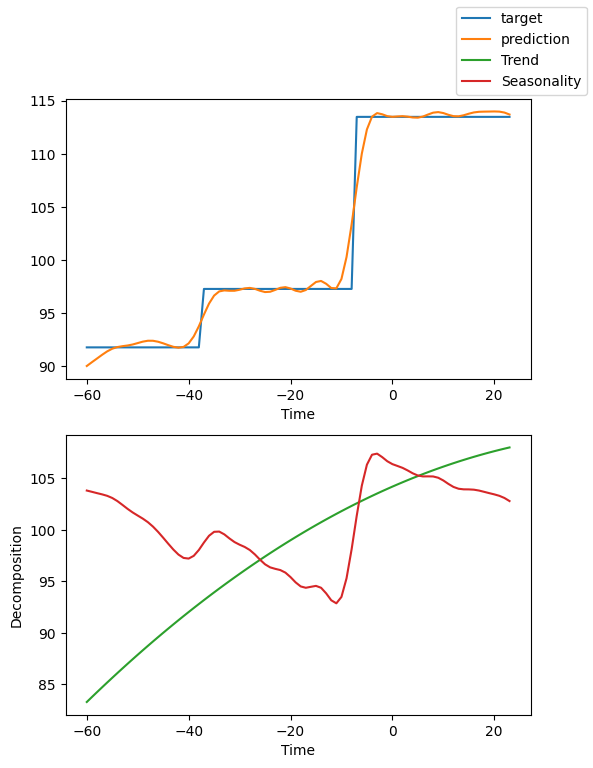

In [ ]:
for idx in range(1):  # plot 10 examples
    best_model.plot_interpretation(x, raw_predictions, idx=idx)

In [ ]:
import numpy
import tensorflow as tf
y_numpy=[]
# Iterate through the test DataLoader and print the batches
for batch in test_dataloader:
    x, y = batch  # x is the input, y is the target
    print("Input (x):")
    print(y)

Input (x):
(tensor([[114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
         114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
         114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
         114.7212, 114.7212, 129.4048]]), None)


In [ ]:
import numpy
import tensorflow as tf
y_numpy=[]
# Iterate through the test DataLoader and print the batches
for batch in test_dataloader:
    x, y = batch  # x is the input, y is the target
    print("Input (x):")
    print(x)

    with tf.compat.v1.Session() as sess:
      y_numpy = tuple(tensor.numpy() if tensor is not None else None for tensor in y)
      print("Target (y):")
      print(y_numpy)

Input (x):
{'encoder_cat': tensor([], size=(1, 60, 0), dtype=torch.int64), 'encoder_cont': tensor([[[-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.6952],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         [-0.1417],
         

In [ ]:
for batch in test_dataloader:
    x, y = batch  # x is the input, y is the target

    # Assuming you have a trained model named 'model'
    with torch.no_grad():
        predictions = best_model(x)

    # 'predictions' now contains the predicted values for the current batch


In [ ]:
y_numpy[0][0,:24]

array([114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
       114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
       114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
       114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 129.4048],
      dtype=float32)

In [ ]:
actual_data = y_numpy[0][0,:24]
actual_data

array([114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
       114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
       114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 114.7212,
       114.7212, 114.7212, 114.7212, 114.7212, 114.7212, 129.4048],
      dtype=float32)

In [ ]:
predictions['prediction'].numpy()[0,:24]

array([114.626854, 114.79784 , 114.85172 , 114.738525, 114.55269 ,
       114.439354, 114.47247 , 114.60103 , 114.69886 , 114.67213 ,
       114.53689 , 114.40614 , 114.398285, 114.54009 , 114.742096,
       114.86807 , 114.84726 , 114.74269 , 114.71857 , 114.923134,
       115.36819 , 115.892784, 116.24316 , 116.220665], dtype=float32)

In [ ]:
forecast_data = predictions['prediction'].numpy()[0,:24]

In [ ]:
forecast_data

array([114.626854, 114.79784 , 114.85172 , 114.738525, 114.55269 ,
       114.439354, 114.47247 , 114.60103 , 114.69886 , 114.67213 ,
       114.53689 , 114.40614 , 114.398285, 114.54009 , 114.742096,
       114.86807 , 114.84726 , 114.74269 , 114.71857 , 114.923134,
       115.36819 , 115.892784, 116.24316 , 116.220665], dtype=float32)

In [ ]:
import numpy as np
def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

smape_value = smape(actual_data, forecast_data)

def mape(actual, forecast):
    return 100 * np.mean(np.abs((actual - forecast) / actual))

mape_value = mape(actual_data, forecast_data)

# Mean Absolute Scaled Error (MASE)
def mase(actual, forecast, seasonality):
    mae = np.mean(np.abs(actual - forecast))
    mean_absolute_seasonal_difference = np.mean(np.abs(actual - np.roll(actual, seasonality)))
    return mae / mean_absolute_seasonal_difference

seasonality = 1  # Adjust this based on the seasonality of your data
mase_value = mase(actual_data, forecast_data, seasonality)

# Mean Absolute Error (MAE)
mae_value = np.mean(np.abs(actual_data - forecast_data))

# Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(np.mean((actual_data - forecast_data)**2))

print(f'sMAPE: {smape_value:.2f}')
print(f'MASE: {mase_value:.2f}')
print(f'MAE: {mae_value:.2f}')
print(f'RMSE: {rmse_value:.2f}')
print(f'MAPE: {mape_value:.2f}')

sMAPE: 0.67
MASE: 0.66
MAE: 0.80
RMSE: 2.73
MAPE: 0.65


In [ ]:
# Calculate and print the runtime
runtime = end_time - start_time
print(f"Training runtime: {runtime} seconds")

Training runtime: 68.27720975875854 seconds


In [ ]:
# net.predict(net.make_future_dataframe(test_data, n_historic_predictions=True))

In [ ]:
# from pytorch_forecasting.metrics import interpret_output


# forecast_nbeats=  interpret_output(NBeats.forward(x),reduction='mean', attention_prediction_horizon=365)

# forecast_nbeats